# MOVIE GENRE CLASSIFICATION USING MACHINE LEARNING

 * Build a Machine learning model that predicts the genre of the movie based on its plot summary or other information

#### 1. Extract and Read Data

In [21]:
import pandas as pd
import zipfile

# Extracting the dataset from the provided zip files
with zipfile.ZipFile(r"C:\Users\shrav\Downloads\train_data.txt.zip") as zip_ref:
    zip_ref.extractall('/mnt/data/')
with zipfile.ZipFile(r"C:\Users\shrav\Downloads\test_data.txt.zip") as zip_ref:
    zip_ref.extractall('/mnt/data/')

train_data = pd.read_csv(r"C:\Users\shrav\Downloads\train_data.txt.zip", delimiter=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
test_data = pd.read_csv(r"C:\Users\shrav\Downloads\test_data.txt.zip", delimiter=':::', engine='python', names=['ID', 'TITLE', 'DESCRIPTION'])


print("Training Data Head:")
print(train_data.head())

print("Testing Data Head:")
print(test_data.head())


Training Data Head:
   ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  
Testing Data Head:
   ID                          TITLE  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         DESCRI

#### 2. EDA and Data visualization

In [22]:
train_data.isnull().sum()
test_data.isnull().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [23]:
train_data.isna().sum()
test_data.isna().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [24]:
train_data.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [25]:
test_data.describe()

,ID
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


C:\Users\shrav\AppData\Local\Temp\ipykernel_3020\1602025054.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_data['GENRE'], order=genre_order, palette='viridis')


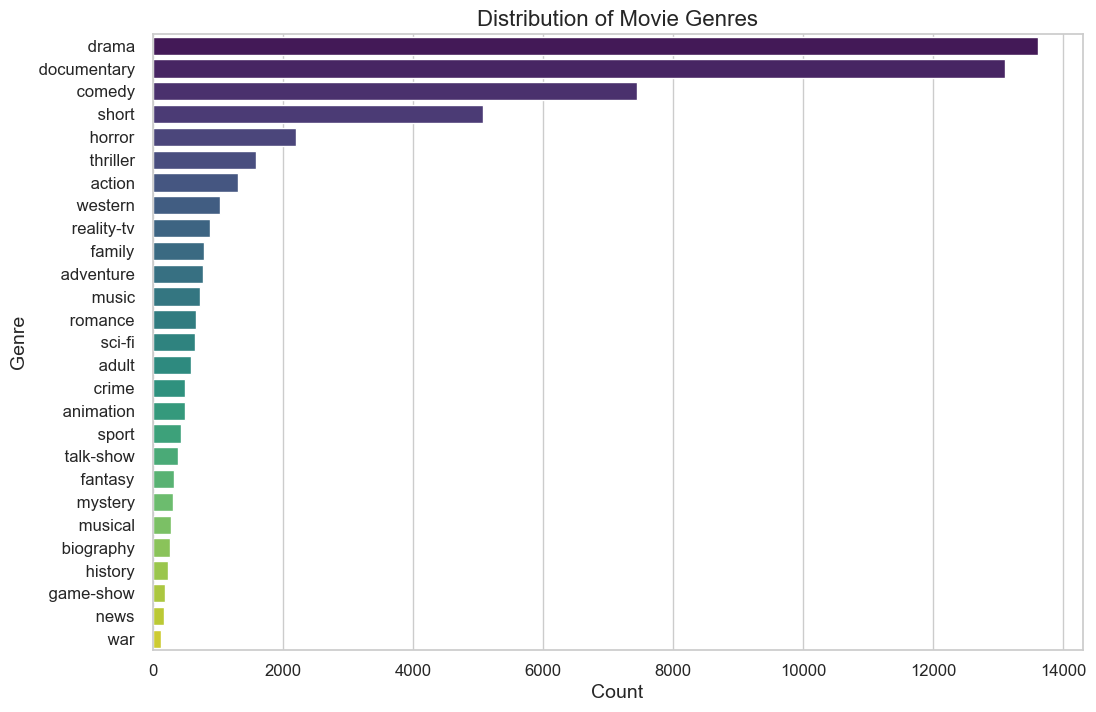

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the distribution of movie genres
plt.figure(figsize=(12, 8))
genre_order = train_data['GENRE'].value_counts().index
sns.countplot(y=train_data['GENRE'], order=genre_order, palette='viridis')
plt.title('Distribution of Movie Genres', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


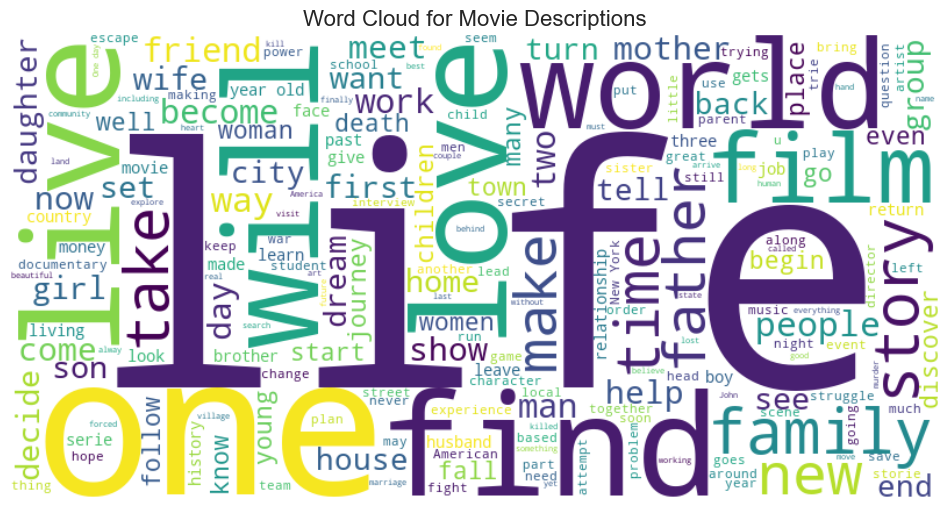

In [29]:
# Generate a word cloud for the descriptions
all_descriptions = ' '.join(train_data['DESCRIPTION'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_descriptions)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Descriptions', fontsize=16)
plt.show()

C:\Users\shrav\AppData\Local\Temp\ipykernel_3020\3811722135.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_df, palette='viridis')


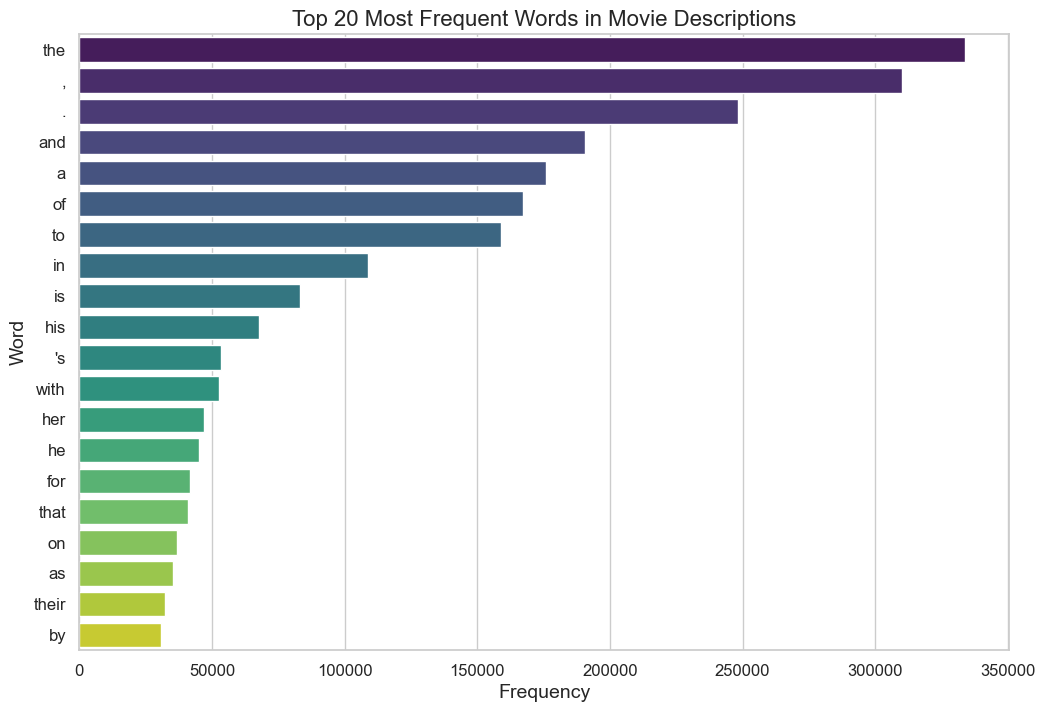

In [30]:
# Show top 20 most frequent words
from collections import Counter
import nltk

words = nltk.word_tokenize(all_descriptions.lower())
word_freq = Counter(words)
common_words = word_freq.most_common(20)

word_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_df, palette='viridis')
plt.title('Top 20 Most Frequent Words in Movie Descriptions', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### 3. Preprocess Data

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import re
import nltk

# Initialize stemmer and stop words
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lower case
    text = text.lower()
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    # Join tokens back into string
    return ' '.join(tokens)

# Apply preprocessing to plot summaries
train_data['cleaned_description'] = train_data['DESCRIPTION'].apply(preprocess_text)
test_data['cleaned_description'] = test_data['DESCRIPTION'].apply(preprocess_text)


In [32]:
# Let the columns are 'cleaned_description' for text data and 'GENRE' for labels in the training data
X = train_data['cleaned_description']
y = train_data['GENRE']

In [33]:

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [34]:
# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, 
                                                  test_size=0.2, 
                                                  random_state=42)

In [35]:
# Vectorize the plot summaries using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

#### 4. Build and Evaluate the Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.57867435 0.57655061 0.57804934 0.58243025 0.5802398 ]
Mean cross-validation score: 0.5791888707781512


In [37]:
# Train the model on the full training data
model.fit(X_train_tfidf, y_train)

# Validate the model
y_val_pred = model.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

Validation Accuracy: 0.5824956192935534
Classification Report:
               precision    recall  f1-score   support

      action        0.52      0.28      0.36       263
       adult        0.80      0.25      0.38       112
   adventure        0.40      0.14      0.21       139
   animation        0.43      0.10      0.16       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.60      0.56      1443
       crime        0.33      0.04      0.07       107
 documentary        0.67      0.83      0.74      2659
       drama        0.54      0.78      0.64      2697
      family        0.46      0.12      0.19       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.95      0.47      0.63        40
     history        0.00      0.00      0.00        45
      horror        0.64      0.60      0.62       431
       music        0.67      0.51      0.58       144
     musical        1.00      0.02      0.04        50
 

c:\Users\shrav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shrav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shrav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

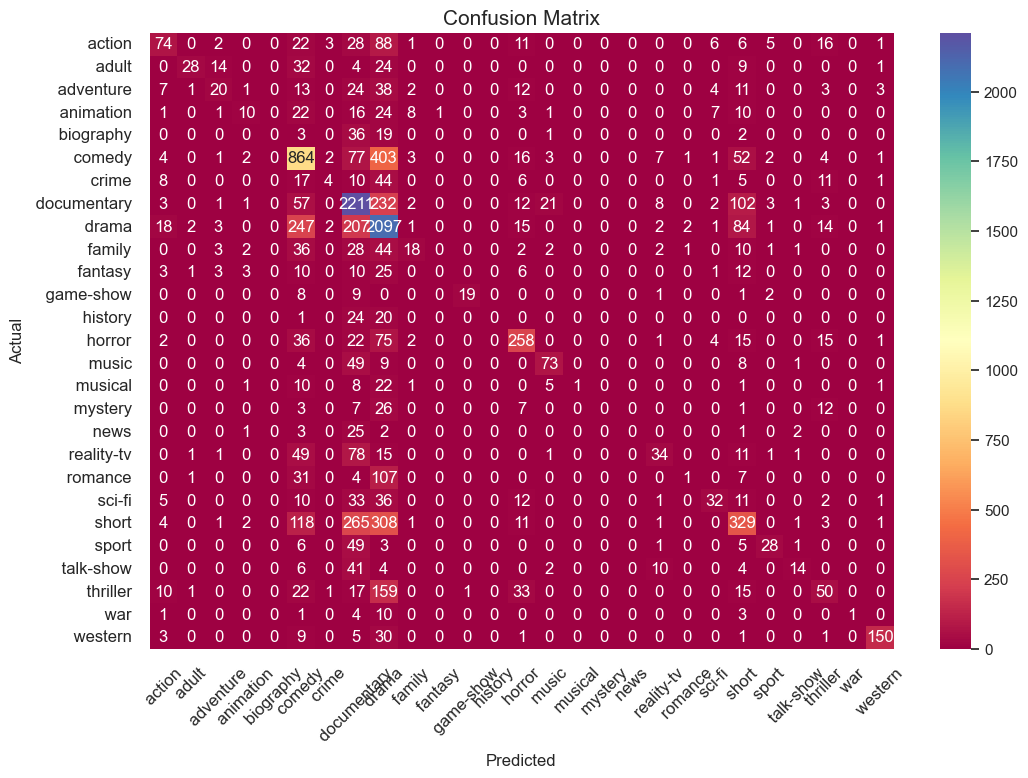

In [38]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True,cmap = 'Spectral', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

#### 5. Make Predictions on Test Data

In [39]:
# Preprocess the test data
X_test = test_data['cleaned_description']
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Predict genres for the test data
y_test_pred = model.predict(X_test_tfidf)

# Convert numeric predictions back to original labels
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred)

# Add predictions to the test data
test_data['predicted_genre'] = y_test_pred_labels

print("Test Data with Predictions:")
print(test_data.head())


Test Data with Predictions:
   ID                          TITLE  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         DESCRIPTION  \
0   L.R. Brane loves his life - his car, his apar...   
1   Spain, March 1964: Quico is a very naughty ch...   
2   One year in the life of Albin and his family ...   
3   His father has died, he hasn't spoken with hi...   
4   Before he was known internationally as a mart...   

                                 cleaned_description predicted_genre  
0  lr brane love life car apart job especi girlfr...          drama   
1  spain march quico naughti child three belong w...          drama   
2  one year life albin famili shepherd north tran...    documentary   
3  father die hasnt spoken brother year serious c...          drama   
4  known intern martial art superstar b

#### 6. Visualize Results

In [40]:
# Display a sample of the test data with predictions
sample_results = test_data[['ID', 'TITLE', 'DESCRIPTION', 'predicted_genre']].head(10)
print("Sample Predictions on Test Data:")
pd.DataFrame(sample_results)

Sample Predictions on Test Data:


,ID,TITLE,DESCRIPTION,predicted_genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,drama
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...,drama
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...,drama
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...,comedy
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...,documentary
9,10,Press (2011),Press is a story of young people overwhelmed ...,drama
